In this notebook we implement the variational quantum eigensolver for systematically finding the low energy subspace comprised of the ground state and the 1st excited state, for the __disordered three site fermionic model with onsite interaction__, (here $t_{ij}$ are chosen from a __uniform random distribution__).
\begin{align}
H=\sum_{ij,\sigma=\uparrow/\downarrow}t_{ij}(c^{\dagger}_{i\sigma}c_{j\sigma}+h.c.)+U\sum_{i}\hat{n}_{i\uparrow}\hat{n}_{i\downarrow}
\end{align}
<figure>
    <img src="./levels.png" alt="drawing" width="300"/>
    <figcaption> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Fig.1: Lowest 6 energy levels of a four qubit system. The red and green dots marks the ground/1st excited state <figcaption>
<figure>  
<br>




In order to search for the low energy subspace constituting both the ground state(red dot) and the 1st excited state(green dot), we define an appropriate cost function as follows,
\begin{align}
C(\boldsymbol{\theta})&=&\langle\Psi_{1}(\boldsymbol{\theta})|H|\Psi_{1}(\boldsymbol{\theta})\rangle+\langle\Psi_{2}(\boldsymbol{\theta})|H|\Psi_{2}(\boldsymbol{\theta})+\beta|\langle\Psi_{1}(\boldsymbol{\theta})|H|\Psi_{2}(\boldsymbol{\theta})\rangle|^{2}~.
\end{align}



Here $\boldsymbol{\theta}$ are the variational parameters and the states are initialized in orthogonal configurations $\langle\Psi_{2}(0)|\Psi_{1}(0)\rangle=0$ in the beginning of the VQE procedure. We impose a further restriction on the choice of initial states, i.e. there is initially no off-diagonal element in the Hamiltonian that couples them,
\begin{align}
$\langle\Psi_{2}(0)|H|\Psi_{1}(0)\rangle=0.$ 
\end{align}
Then a optimized circuit
\begin{align}
U(\boldsymbol{\theta})=\prod_{k=1}\exp(\tau_{k}\theta_{k})
\end{align}
is sought, that would map these two orthogonal states $|\Psi_{1}(\boldsymbol{\theta})\rangle=U(\boldsymbol{\theta})|\Psi_{1}(0)\rangle$, $|\Psi_{2}(\boldsymbol{\theta})\rangle=U(\boldsymbol{\theta})|\Psi_{2}(0)\rangle$, to the ground state and 1st excited state. The evolution of the  effective low energy Hamiltonian, can be understood as follows:\\
If,
\begin{align}
H_{eff}&=&\begin{pmatrix}\langle\Psi_{1}(\boldsymbol{\theta})|H|\Psi_{1}(\boldsymbol{\theta})\rangle && \langle\Psi_{1}(\boldsymbol{\theta})|H|\Psi_{2}(\boldsymbol{\theta})\rangle\\
\langle\Psi_{2}(\boldsymbol{\theta})|H|\Psi_{1}(\boldsymbol{\theta})\rangle && \langle\Psi_{2}(\boldsymbol{\theta})|H|\Psi_{2}(\boldsymbol{\theta})\rangle
\end{pmatrix}
\end{align}
then the variational optimization happens in the background of a penalty hyper parameter $\beta$, such that the off-diagonal elements is vanishingly small, 
\begin{align}
|\langle\Psi_{1}(\boldsymbol{\theta})|H|\Psi_{2}(\boldsymbol{\theta})\rangle|\to 0~.
\end{align}
In order to perform the concurrent optimization (i.e. optimization towards the subspace constituting ground state & 1st excited state) we need an additional ancilla qubit that is coupled to two orthogonal initial configuration of the system qubits. One way of preparing such a state, for a system of __four qubits and one ancilla qubit__:
<img src="./new_circ_init.jpg" alt="drawing" width="500"/>

In the figure above a set of ancilla controlled unitary initially prepares one of the system configurations $|\Psi_{1}\rangle$ entangled with the $|1\rangle $ configuration of the ancilla, next the orthogonal system configuration ($|\Psi_{2}\rangle$) is entangled with the $|0\rangle$ configuration of the ancilla.

After preparing the initial state the adaptive VQE algorithm is performed, where multiqubit gates are selected based on the maximum gradient criterion (of the cost function $C(\boldsymbol{\theta}$) added and the cost function ($C(\boldsymbol{\theta})$) optimized using a classical optimizer, in our case BFGS.<br>
__Similarities and differences to the other variational algorithms for the excited__<br>
    The subspace search VQE (SSVQE) ``Variational Quantum Computation of Excited States``(https://doi.org/10.22331/q-2019-07-01-156) maps a set of orthogonal initial states to a energy eigenstates of the Hamiltonian.  In there approach no __ancilla qubits or hyper-parameters__ are necessary, neither one needs to measure the inner-product between states, however they require two different unitary circuits to find say the __ground state__ and the __kth eigenstate__. Another alternative algorithm for finding excited states is the variational quantum deflation (VQD) algorithm ``Variational Quantum Computation of Excited States`` (https://quantum-journal.org/papers/q-2019-07-01-156/). Here one first optimizes to the ground state, then redefines the cost function with an added penalty function for the overlap between the ansatz ground state and the excited state ansatz. In this approch, we need a hyper-parameter (penalty factor!), further one needs to perform additional measurements of inner-product between states (involving k ancilla qubits if k eigenstates needs to be prepared). As a result we obtain k-different unitary circuit ansatz for the k eigenstates. Another route to constructing excited states is using the adaptive variational quantum algorithm with the energy variance as a cost function , i.e. the VQE-X algorithm ``Adaptive variational quantum eigensolvers for highly excited states``(https://journals.aps.org/prb/abstract/10.1103/PhysRevB.104.075159). <br>
    <br>
In the present demonstration for a simple toy model of interacting electrons we coptimize towards the low energy subspace using a single unitary circuit that maps a pair of orthogonal states to the ground state and the first excited state. In this approach we are indeed able to construct a single unitary circuit that can directly lead to low energy eigenstates by acting on two appropriately chosen orthogonal initial states, albeit at the cost of additional quantities that need to be measured:<br>
    1> Estimation of the Hamiltonian expectation value for the two states, i.e. $\langle\Psi_{1}(\boldsymbol{\theta})|H|\Psi_{1}(\boldsymbol{\theta})\rangle$ and $\langle\Psi_{2}(\boldsymbol{\theta})|H|\Psi_{2}(\boldsymbol{\theta})\rangle$.<br> 
    2> The Hamiltonian transition matrix element between the two states $\langle\Psi_{1}(\boldsymbol{\theta})|H|\Psi_{2}(\boldsymbol{\theta})\rangle$. Further we need an appropriate numerical choice of the hyperparameter $\beta$ which penalizes any non-zero transition matrix element. <br>
    Note we do not need to measure the inner product, because the initial states are orthogonal and unitary transformations preserves inner product.<br>

In [25]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy
import copy
import qiskit
from qiskit.circuit.library import MCMT
import matplotlib.pyplot as plt
from qiskit.circuit.random import random_circuit
from qiskit.opflow.primitive_ops import PauliSumOp
import ipyparallel as ipp
from qiskit.aqua.operators.legacy import op_converter
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit.providers.aer import AerSimulator
from openfermion.linalg import givens_decomposition_square as givensRotns
from qiskit.opflow import I,X,Y,Z,StateFn,AbelianGrouper
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from openfermion.linalg import givens_decomposition_square as givensRotns
from qiskit_nature.problems.second_quantization.electronic.builders import fermionic_op_builder
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper
from qiskit.quantum_info import Pauli
from openfermion.circuits import slater_determinant_preparation_circuit
from qiskit import QuantumCircuit,execute,QuantumRegister,ClassicalRegister
from qiskit import Aer
from joblib import Parallel,delayed
from qiskit.aqua.operators import WeightedPauliOperator,Z2Symmetries
from qiskit.chemistry.components.variational_forms import UCCSD
import scipy
import time
import matplotlib.image as mpllimg
from matplotlib import animation
import numpy
from IPython.display import display, Image
from matplotlib import animation
from IPython.display import HTML

In [2]:
backend=Aer.get_backend('statevector_simulator')

In [3]:
#Construct Model Hamiltonian
def countYgates(pauli_label):
    countYgates = sum(map(lambda x : 1 if 'Y' in x else 0, pauli_label))
    return countYgates
def qubitOp(h1,h2):
    num_qubits=h1.shape[0]
    fer_op=fermionic_op_builder.build_ferm_op_from_ints(h1,h2)
    mapper=ParityMapper()
    qubit_op=mapper.map(fer_op)
    qubit_conv = QubitConverter(mapper, two_qubit_reduction=True, z2symmetry_reduction="auto")
    qubit_op = qubit_conv.convert(fer_op, num_qubits//2)
    return qubit_op
def Hamiltonian(h1=None,h2=None):
    if numpy.any(h1)==None:
        h1=2*numpy.random.rand(num_qubits//2,num_qubits//2)-1
        #impose hermiticity on h1
        h1=(h1+h1.T)/2.
        h1=numpy.block([[h1,numpy.zeros((num_qubits//2,num_qubits//2))],
                       [numpy.zeros((num_qubits//2,num_qubits//2)),h1]])        
    if numpy.any(h2)==None:    
        h2=numpy.zeros((num_qubits,num_qubits,num_qubits,num_qubits))
    #impose eight-fold symmetry
        h2[0,0,3,3]=h2[1,1,4,4]=h2[2,2,5,5]=numpy.random.rand()
    qubitH=qubitOp(h1,h2)
    Hmat=qubitH.to_matrix(massive=True)
    w,v=numpy.linalg.eigh(Hmat)
    Eg=w[0]
    Ee=w[1]
    state_g=v[:,0]
    state_e=v[:,1]
    return qubitH,Hmat,Eg,Ee,state_g,state_e,h1,h2

In [4]:
def commutator(A,B):
        B2=WeightedPauliOperator([[-B.paulis[0][0],B.paulis[0][1]]])
        return A.multiply(B).add(B2.multiply(A))
def Pool():
    labels=['IIIY', 'IIXY', 'IIYI', 'IIYX', 'IIYZ', 'IIZY', 'IYII', 'IYIZ', 'IYZZ', 
            'IZIY', 'IZXY', 'IZYX', 'IZZY', 'XYII', 'XYIZ', 'XYZI', 'YIII', 'YIZI', 
            'YIZZ', 'YXII', 'YXIZ', 'YXZI', 'YZII', 'YZZI', 'YZZZ', 'ZIXY', 'ZIYI', 
            'ZIYX', 'ZIYZ', 'ZYII', 'ZYIZ', 'ZYZZ', 'ZZIY', 'ZZYI', 'ZZYZ', 'ZZZY']
    pool=[WeightedPauliOperator([[1j,Pauli(labels[i])]]) for i in range(len(labels))]
    return pool
def compute_gradient(params,gs_ansatz,exc_ansatz,op):
    gs_ansatz.push_hopping_operator(op)
    exc_ansatz.push_hopping_operator(op)
    print(exc_ansatz.num_parameters,gs_ansatz.num_parameters)
    E1=cost_fn(params+[0.01],Hmat,gs_ansatz,exc_ansatz,False)
    E2=cost_fn(params+[-0.01],Hmat,gs_ansatz,exc_ansatz,False)
    grad=(E1-E2)/0.02
    gs_ansatz.pop_hopping_operator()
    exc_ansatz.pop_hopping_operator()
    return grad

In [6]:
def cost_fn(params,Hmat,gs_ansatz,exc_ansatz,save_steps):
    gs_circ=gs_ansatz.construct_circuit(parameters=params)
    exc_circ=exc_ansatz.construct_circuit(parameters=params)
    gs_state=execute(gs_circ,backend,shots=1024).result().get_statevector() 
    exc_state=execute(exc_circ,backend,shots=1024).result().get_statevector() 
    beta0=1e4
    A=(gs_state.conj()@Hmat@gs_state).real
    B=(exc_state.conj()@Hmat@exc_state).real
    C=((exc_state.conj()@Hmat@gs_state)*(gs_state.conj()@Hmat@exc_state)).real
    E=A+B+beta0*C
    if save_steps==True:
        with open('new_test_4.txt','+a') as f:
            Str=["{:0.16f}".format(params[i].real) for i in range(len(params))]
            print('['+','.join(Str)+']'+'#'+"{:0.16f}".format(A)+'#'+"{:0.16f}".format(B)+'#'+"{:0.05f}".format(C),file=f)
    return E

In [7]:
#load Hamiltonian
h1=numpy.load('h1_6.npy')
h2=numpy.load('h2_6.npy')

In [8]:
num_qubits=6
#h1 is a random 4x4 hopping Hamiltonian
qubitH,Hmat,Eg,E1,state_g,state_e,h1,h2=Hamiltonian(h1,h2)

In [9]:
#Hamiltonian is a Tapered Summed Pauli Operator representing in the parity encoding scheme with Z^2 symmetry based two qubit reduction
print(qubitH)

-0.4707452762207464 * IIII
+ 0.1365915752151789 * ZIII
- 0.11309137029690804 * IZII
- 0.16805495419167477 * ZZII
- 0.1365915752151789 * IIZI
- 0.10249643119330751 * ZIZI
+ 0.11309137029690802 * IIIZ
+ (-0.10249643119330751+6.938893903907228e-18j) * IZIZ
- 0.16805495419167477 * IIZZ
+ 0.10249643119330752 * ZZZZ
+ 0.16640421719930132 * XIII
- 0.16640421719930132 * XZII
+ 0.049183861940033304 * IXII
+ (0.049183861940033304+3.469446951953614e-18j) * ZXII
- 0.002902392569130773 * XXII
+ 0.0029023925691307726 * YYII
+ 0.16640421719930132 * IIXI
+ 0.16640421719930132 * IIXZ
+ 0.049183861940033304 * IIIX
- 0.049183861940033304 * IIZX
+ (-0.0029023925691307726-2.168404344971009e-19j) * IIXX
+ 0.0029023925691307726 * IIYY


In [10]:
w,v=numpy.linalg.eigh(Hmat)

In [11]:
w[0],w[1]

(-1.1146860513261823, -1.0666124063177136)

In [12]:
#pool
pool=Pool()

# the function below carries out adapt VQE with a given cost fn.

In [13]:
def build_parametrized_ansatz(init_circ,generators):
    var_form_base=UCCSD(num_qubits,num_particles=num_qubits//2, initial_state=init_circ,qubit_mapping='parity',two_qubit_reduction=True)
    var_form_base.manage_hopping_operators()
    for i in range(len(generators)):
        var_form_base.push_hopping_operator(WeightedPauliOperator([[1j,Pauli(generators[i])]]))
    return var_form_base    

In [14]:
#build parametrized circuit for gs from the data_file
circ=QuantumCircuit(4)
circ.x(0)
circ.x(2)
circ.ry(-numpy.pi/3,2)
var_form_base=build_parametrized_ansatz(circ,[])
circ1=QuantumCircuit(4)
circ1.x(1)
circ1.x(3)
circ.ry(-numpy.pi/3,3)
var_form_base2=build_parametrized_ansatz(circ1,[])

In [15]:
def algo(cost_fn,Hmat,pool,gs_ansatz,exc_ansatz,steps,params):
    EnergyArr=[]
    ExcOps=[]
    ti=time.time()
    for i in range(steps):
        grads=numpy.array([compute_gradient(params,gs_ansatz,exc_ansatz,pool[i]) for i in range(len(pool))])
        indexes=numpy.argsort(abs(grads))[::-1][:5]
        print("five highest grads",grads[indexes[0]],grads[indexes[1]],grads[indexes[2]],grads[indexes[3]],grads[indexes[4]])
        if ((i>=1) and (pool[indexes[0]].paulis[0][1].to_label()==ExcOps[-1])):
            chosen_id=indexes[1]
        elif ((i>=2) and (pool[indexes[0]].paulis[0][1].to_label()==ExcOps[-2])):
            chosen_id=indexes[2]
        elif ((i>=3) and (pool[indexes[0]].paulis[0][1].to_label()==ExcOps[-3])):
            chosen_id=indexes[3]
        elif ((i>=4) and (pool[indexes[0]].paulis[0][1].to_label()==ExcOps[-4])):
            chosen_id=indexes[4]
        else:
            chosen_id=indexes[0]
        PauliOp=pool[chosen_id]
        ExcOps.append(PauliOp.paulis[0][1].to_label())
        print("chosen Op",ExcOps[-1])
        with open('new_test_4.txt','a') as f:
            print("label-",ExcOps[-1],file=f)
        params.append(0.0)
        gs_ansatz.push_hopping_operator(PauliOp)
        exc_ansatz.push_hopping_operator(PauliOp)
        res=scipy.optimize.minimize(cost_fn,params,args=(Hmat,gs_ansatz,exc_ansatz,True),method='BFGS',options={'ftol':1e-7})
        params,E=list(res['x']),res['fun']
        print("num_params",var_form_base.num_parameters)
        print("Energy",E)
        EnergyArr.append(E)
        print("time elapsed",time.time()-ti)    
        error=EnergyArr[-1]-Eg

In [26]:
#This VQE functionality leads to the subspace
algo(cost_fn,Hmat,pool,var_form_base,var_form_base2,25,[])

In [17]:
%matplotlib inline

In [18]:
def energy_level(p,q):
    figure,ax=plt.subplots(1,figsize=(4,6))
    w,v=numpy.linalg.eigh(Hmat)
    ax.plot([0]*9,w[:9],marker='_',markersize=40,linestyle='',markeredgewidth=2.5)
    ax.set_ylabel('Energy',fontsize=15)
    ax.set_xlabel('')
    ax.set_xlim([-0.1,0.1])
    ax.set(xticklabels='')
    ax.set_yticks(numpy.round(w[:9],3))
    ax.tick_params(labelsize=8)
    ax.scatter(0,p,marker='o',color='red',s=120)
    ax.scatter(0,q,marker='o',color='green',s=120)
    plt.savefig('levels.png')
    return ax

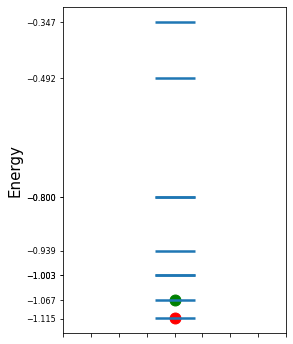

In [19]:
energy_level(w[0],w[1])

In [20]:
w

array([-1.11468605, -1.06661241, -1.0033055 , -1.0033055 , -0.93941072,
       -0.7998046 , -0.7998046 , -0.49202574, -0.34667882, -0.32651197,
       -0.14480605, -0.14317792, -0.08729197, -0.07987101, -0.07987101,
        0.89523944])

In [24]:
labels=[]
params_arr=[]
Eg_arr=[]
E1_arr=[]
count_arr=[]
count=0
with open('subspace_mapping_VQE_results.txt','r') as f:
    lines=f.readlines()
    for i in range(len(lines)):
        line=lines[i]
        if line[0]=='l':
            label=line.split('-')[1][1:-1]
            labels.append(label)
            count_arr.append(count)
            count=0
        else:
            count=count+1
            params,Eg,E1,C=lines[i].split('#')
            params_arr.append(eval(params))
            Eg_arr.append(eval(Eg))
            E1_arr.append(eval(E1))
    count_arr.append(count)                             

In [28]:
def add_multiqubit_gate(pauli_string, param, circuit):
    num_qubits=circuit.num_qubits
    qr=QuantumRegister(num_qubits,'q')
    if pauli_string == 'I'*num_qubits:
        gate = 1
        for j in range(len(pauli_string)):
            gate = numpy.kron(gate, Pauli('I').to_matrix())
        gate *= -1j * np.sin(param)
        gate += numpy.cos(param) * np.eye(2**num_qubits)
        circuit.unitary(gate, qr, label=pauli_string)
    else:
        qubits_to_act_on = []
        gate = 1
        for j in range(len(pauli_string)):
            if pauli_string[j] != 'I':
                gate=numpy.kron(Pauli(pauli_string[j]).to_matrix(),gate)
                qubits_to_act_on.append(num_qubits-j-1)
        gate *= (-1j * numpy.sin(param))
        gate += numpy.cos(param) * numpy.eye(2**len(qubits_to_act_on))
        List_regs=[qr[i] for i in qubits_to_act_on][::-1]
        Label=pauli_string+"\n{:0.02f}".format(param.real)
        circuit.unitary(gate, List_regs, label = Label)
    return circuit

In [38]:
inds=[0,5,9,11]+[16,29,35,39]+[40,70,90,114]+[115,150,200,250,280]+[281,312,375,406]+[407,450,500,550,598]+[600,720,740]+[741,1200,1500,1592]+[1593,1650,1700,1750,2001]+list(numpy.linspace(2002,24682,61))

In [34]:
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import FixedLocator

In [42]:
# First set up the figure, the axis, and the plot element we want to animate
#indexes=list(numpy.arange(3,10))+list(numpy.arange(10,37))+list(numpy.arange(75,85))+list(numpy.arange(140,146))
def init_circ():
    qr=QuantumRegister(5,'q')
    circ=QuantumCircuit(qr)
    circ.h(0)
    circ.cx(0,qr[1])
    circ.cx(0,qr[3])
    circ.cry(-numpy.pi/3,0,qr[3])
    circ.x(0)
    circ.cx(0,qr[2])
    circ.cx(0,qr[4])
    circ.cry(-numpy.pi/3,0,qr[4])
    return circ
fig,ax = plt.subplots(2,1,figsize=(14,12))
ax[0].set_ylabel('Energy',fontsize=15)
ax[0].set_xlabel('steps',fontsize=15)
ax[0].set_xlim([0,2000])
ax[0].set_ylim([-1.2,-0.2])
ax[0].set_yticks([-1.2,-0.9,-0.6,-0.3])
#minor_loc=FixedLocator(numpy.round(w[0:8],2))
#ax[0].yaxis.set_minor_locator(minor_loc)
#ax[0].yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
ax[0].tick_params(labelsize=15)
#ax[0].set_yscale('log')
line_plt1,=ax[0].plot([],[],color='red',markersize=10,linestyle='-',label='1st excited_state')
line_plt2,=ax[0].plot([],[],color='green',markersize=10,linestyle='-',label='ground_state')
scatter_plt1,=ax[0].plot([],[],marker='o',color='red',markersize=10,linestyle='-')
scatter_plt2,=ax[0].plot([],[],marker='o',color='green',markersize=10,linestyle='-')
circ=init_circ()
circ.draw('mpl',filename='./new_circ_init.jpg',scale=2.5)
ax[1].axis("off")
img=mpllimg.imread('./new_circ_init.jpg')
image=ax[1].imshow(img)


def prepare_circ(params):
    circ=QuantumCircuit(QuantumRegister(5,'q'))
    circ.h(4)
    circ.cx(4,0)
    circ.cx(4,2)
    circ.cry(-numpy.pi/3,4,2)
    circ.x(4)
    circ.cx(4,1)
    circ.cx(4,3)
    circ.cry(-numpy.pi/3,4,3)
    for j in range(len(params)):
        circ=add_multiqubit_gate(labels[j], params[j], circ)
    return circ
# Initialization function: plot the background of each frame
def init():
    line_plt1.set_data([],[])
    line_plt2.set_data([],[])
    scatter_plt1.set_data([],[])
    scatter_plt2.set_data([],[])
    img=mpllimg.imread('./circ_init.jpg')
    ax[1].axis("off")
    image=ax[1].imshow(img)
    return image,line_plt1,line_plt2,scatter_plt1, scatter_plt2

# # Animation function which updates figure data.  This is called sequentially
def animate(i):
    if inds[i]>2000:
        ax[0].set_ylim([-1.12,-1.02])
        ax[0].set_yticks([-1.12,-1.07,-1.02])
        ax[0].set_xlim([2000,inds[-1]])
    line_plt1.set_data(numpy.arange(inds[i]),Eg_arr[:int(inds[i])])
    line_plt2.set_data(numpy.arange(inds[i]),E1_arr[:int(inds[i])])
    scatter_plt1.set_data(inds[i],Eg_arr[int(inds[i])])
    scatter_plt2.set_data(inds[i],E1_arr[int(inds[i])])
    circ=prepare_circ(params_arr[int(inds[i])])
    circ.draw('mpl',filename='./circ_instant_new.jpg',scale=2.5)
    img=mpllimg.imread('./circ_instant_new.jpg')
    ax[1].axis("off")
    image=ax[1].imshow(img)
    print(i)
    return line_plt1,line_plt2,scatter_plt1, scatter_plt2,image

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(inds), interval=300, blit=True)

plt.close(anim._fig)

# Call function to display the animation
HTML(anim.to_html5_video())
#anim.save('filename.gif', writer='ffmpeg')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
